<a href="https://colab.research.google.com/github/raj245rohit/Crypto-Price-Change-Prediction/blob/main/ML_Algorithm_for_guessing_top_10_cryptos_for_next_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [1]:
!pip install python-binance

import pandas as pd
import numpy as np
from binance.client import Client
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Defaulting to user installation because normal site-packages is not writeable


#Importing Data from Binance Api

In [7]:
api = pd.read_csv('/home/raj/Desktop/binance_api.txt', sep=",", header=None)
api_key = api.iloc[0,0]
api_secret = api.iloc[0,1]

client = Client(api_key, api_secret)
tickers = client.get_ticker()
result = []
for ticker in tickers:
    if ticker['symbol'][-4:] == 'USDT':
        if ticker['symbol'][-6:-4]=='UP' or ticker['symbol'][-8:-4]=='DOWN':
            continue
        result.append(ticker)
    else:
        continue
priceChange_data = pd.DataFrame(result,columns=['symbol', 'priceChange', 'priceChangePercent', 'weightedAvgPrice'])
priceChange_data = final.astype({'priceChange':'float64', 'priceChangePercent':'float64', 'weightedAvgPrice':'float64'})
priceChange_data

,symbol,priceChange,priceChangePercent,weightedAvgPrice
0,BTCUSDT,1783.93000,6.305,29455.804073
1,ETHUSDT,57.64000,3.104,1899.053409
2,BNBUSDT,16.80000,5.374,322.855541
3,BCCUSDT,0.00000,0.000,0.000000
4,NEOUSDT,0.27000,2.231,12.356172
...,...,...,...,...
395,IDUSDT,0.01068,2.343,0.464994
396,ARBUSDT,0.05870,5.020,1.225599
397,LOOMUSDT,0.00220,3.444,0.065533
398,OAXUSDT,0.00210,0.776,0.276770


Selecting Top 30 and Bottom 30 Cryptocurrencies based on their percent change

In [64]:
top30 = priceChange_data.sort_values(by=['priceChangePercent'], ascending=False).head(30)
bottom30 = priceChange_data.sort_values(by=['priceChangePercent'], ascending=False).tail(30)
final_data = pd.concat([top30,bottom30]).reset_index()
final_data

,index,symbol,priceChange,priceChangePercent,weightedAvgPrice
0,205,JUVUSDT,1.242000,37.785,4.293373
1,210,ATMUSDT,0.817000,26.849,3.622658
2,213,RIFUSDT,0.028400,23.627,0.139261
3,211,ASRUSDT,0.668000,22.690,3.702650
4,323,SANTOSUSDT,0.881000,19.119,5.279865
5,321,RNDRUSDT,0.223000,16.932,1.482472
6,223,ACMUSDT,0.414000,15.333,3.028438
7,314,PORTOUSDT,0.400200,14.523,3.135385
8,302,LAZIOUSDT,0.405900,14.127,3.227010
9,348,ALPINEUSDT,0.471800,13.974,3.678859


In [58]:
print(final_data)

None


Getting Last 7 days hourly price data for above 60 cryptocurrencies

In [148]:
from datetime import datetime,timedelta

def GetHistoricalData(symbol, interval, fromDate, toDate):
    klines = client.get_historical_klines(symbol, interval, fromDate, toDate)
    df = pd.DataFrame(klines, columns=['dateTime', 'open', 'high', 'low', 'close', 'volume', 'closeTime', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol', 'takerBuyQuoteVol', 'ignore'])
    df.dateTime = pd.to_datetime(df.dateTime, unit='ms')
    df['date'] = df.dateTime.dt.strftime("%d/%m/%Y")
    df['time'] = df.dateTime.dt.strftime("%H:%M:%S")
    df = df.drop(['dateTime', 'closeTime', 'quoteAssetVolume', 'takerBuyBaseVol','takerBuyQuoteVol', 'ignore', "open", "high", "low", 'numberOfTrades'], axis=1)
    column_names = ["date", "time", "close", "volume"]
    df = df.reindex(columns=column_names)
    return df

Price_Data = {'symbols':[],'past_7_days_price':[], 'Predicted%Change':[]}


now = datetime.now()
fromDate = str(now-timedelta(7))
toDate = str(now)
interval = Client.KLINE_INTERVAL_1HOUR


for symbol in final_data['symbol']:
    past_7_days_price = GetHistoricalData(symbol, interval, fromDate, toDate)
    
    if len(past_7_days_price) < 20:
        continue
    Price_Data['symbols'].append(symbol)
    Price_Data['past_7_days_price'].append(past_7_days_price)
    Price_Data['Predicted%Change'].append(0)

price_df = pd.DataFrame(Price_Data)
price_df.iloc[0,1]

,date,time,close,volume
0,04/04/2023,22:00:00,2.58100000,3708.87000000
1,04/04/2023,23:00:00,2.57300000,1617.85000000
2,05/04/2023,00:00:00,2.59300000,1582.19000000
3,05/04/2023,01:00:00,2.58100000,12589.07000000
4,05/04/2023,02:00:00,2.57000000,6250.55000000
...,...,...,...,...
157,11/04/2023,11:00:00,4.57000000,629286.97000000
158,11/04/2023,12:00:00,4.36200000,362742.84000000
159,11/04/2023,13:00:00,4.16700000,443064.63000000
160,11/04/2023,14:00:00,4.12100000,404063.97000000


In [150]:
for i in range(len(price_df['past_7_days_price'])):
  price_df['past_7_days_price'].iloc[i]['close']= price_df['past_7_days_price'].iloc[i]['close'].astype('float32')

Visualize Price for few Cryptos

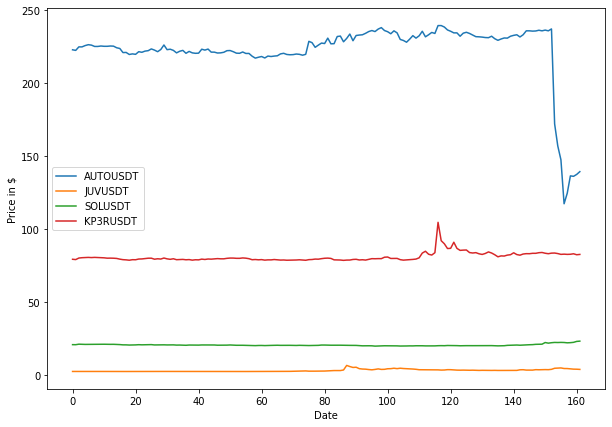

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline


price_df['past_7_days_price'].iloc[59]['close'].plot(figsize=(10, 7))
price_df['past_7_days_price'].iloc[0]['close'].plot(figsize=(10, 7))
price_df['past_7_days_price'].iloc[16]['close'].plot(figsize=(10, 7))
price_df['past_7_days_price'].iloc[36]['close'].plot(figsize=(10, 7))
plt.legend([price_df.iloc[59]['symbols'],price_df.iloc[0]['symbols'],price_df.iloc[16]['symbols'],price_df.iloc[36]['symbols']])
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.show()

Builing ML Algorithm to predict prices on next day

In [152]:
n=14

pd.options.mode.chained_assignment = None  # default='warn'

ml = LinearRegression()

for i in range(len(price_df['past_7_days_price'])):
    # price_df['past_7_days_price'].iloc[i]['close'] = pd.to_numeric(price_df['past_7_days_price'].iloc[i]['close'],errors = 'coerce')
    price_df['past_7_days_price'].iloc[i]['diff'] = price_df['past_7_days_price'].iloc[i]['close'].diff(1)
    price_df['past_7_days_price'].iloc[i]['gain'] = price_df['past_7_days_price'].iloc[i]['diff'].clip(lower=0)
    price_df['past_7_days_price'].iloc[i]['loss'] = price_df['past_7_days_price'].iloc[i]['diff'].clip(upper=0).abs()
    price_df['past_7_days_price'].iloc[i]['avg_gain'] = price_df['past_7_days_price'].iloc[i]['gain'].rolling(window=n, min_periods=n).mean()[:n+1]
    price_df['past_7_days_price'].iloc[i]['avg_loss'] = price_df['past_7_days_price'].iloc[i]['loss'].rolling(window=n, min_periods=n).mean()[:n+1]

    for j, row in enumerate(price_df['past_7_days_price'].iloc[i]['avg_gain'].iloc[n + 1:]):
        price_df['past_7_days_price'].iloc[i]['avg_gain'].iloc[j+n+1] = (price_df['past_7_days_price'].iloc[i]['avg_gain'].iloc[j+n] * (n-1) + price_df['past_7_days_price'].iloc[i]['gain'].iloc[j+n+1])/n

    for j, row in enumerate(price_df['past_7_days_price'].iloc[i]['avg_loss'].iloc[n + 1:]):
        price_df['past_7_days_price'].iloc[i]['avg_loss'].iloc[j+n+1] = (price_df['past_7_days_price'].iloc[i]['avg_loss'].iloc[j+n] * (n-1) + price_df['past_7_days_price'].iloc[i]['loss'].iloc[j+n+1])/n
    
    price_df['past_7_days_price'].iloc[i]['RS'] = price_df['past_7_days_price'].iloc[i]['avg_gain'] / price_df['past_7_days_price'].iloc[i]['avg_loss']
    price_df['past_7_days_price'].iloc[i]['RSI'] = 100 - (100 / (1 + price_df['past_7_days_price'].iloc[i]['RS']))
    price_df['past_7_days_price'].iloc[i]['SMA'] = price_df['past_7_days_price'].iloc[i]['close'].rolling(window=14).mean()
    
#     ML Algorithm 
    x = price_df['past_7_days_price'].iloc[i][['RSI','SMA']].values
    y = price_df['past_7_days_price'].iloc[i]['close'].values
    
    ml.fit(x[14:-24],y[38:])
    y_pred = ml.predict([x[-1]])
    
    change = (y_pred-y[-1])*100/y[-1]
    price_df['Predicted%Change'].iloc[i] = change
    


Final Output of top 10 cryptos by predicted % price change 

In [154]:
result = price_df.drop(['past_7_days_price'], axis=1).sort_values(by=['Predicted%Change'], ascending=False)
print(result[:10])

      symbols  Predicted%Change
59   AUTOUSDT         75.852319
58   NEBLUSDT         41.171167
20  JASMYUSDT         14.267756
55    BNTUSDT         13.485070
46    UTKUSDT          5.184787
22    TVKUSDT          4.885898
37    COSUSDT          4.369199
27    BTCUSDT          4.275587
13   CITYUSDT          4.040255
53   PERLUSDT          3.353820
